In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
fs = 150  # hz
T = 2.2  # s
N = int(T * fs)

In [2]:
def fft(func, size):
    X = [func(x) for x in range(size)]
    return np.fft.fft(X)

In [4]:
def dft(func, size):
    X = [0] * size
    for k in range(size):
        X[k] = sum([
            func(n) * np.exp((-1j * np.pi * k * n) / size)
            for n in range(size)
        ])
    return X

In [5]:
def prepare_plot(X):
    size = len(X) // 2 - 1
    
    M = [0] * size
    for k in range(size):
        M[k] = np.sqrt(X[k].real ** 2 + X[k].imag ** 2)

    M_ = [10 * np.log10(m) for m in M]
    fk = [k * fs / len(X) for k in range(size)]
    
    return fk, M_

In [6]:
def plot(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    line, = ax.plot(x, y, color='blue', lw=2)
    
    ax = fig.add_subplot(2, 1, 2)
    line, = ax.plot(x, y, color='blue', lw=2)
    ax.set_xscale('log')

In [25]:
def calculate(func):
    dft_st = datetime.now()
    X = dft(func, N)
    dft_en = datetime.now()
    fft_st = datetime.now()
    X = fft(func, N)
    fft_en = datetime.now()
    
    x, y = prepare_plot(X)
    plot(x, y)
    return dft_en - dft_st, fft_en - fft_st

In [26]:
x = lambda n: 0.9 * np.sin(2 * np.pi * (n / fs) * np.cos(np.pi * (n / fs)) + 3 * np.pi)

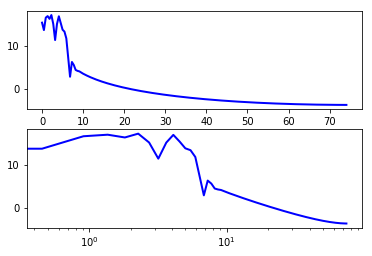

In [27]:
x_dft, x_fft = calculate(x)

In [28]:
y = lambda n: np.exp(-n / 25)
z = lambda n: 0.001 * x(n) + 0.01 * y(n)
v = lambda n: x(n) * y(n)

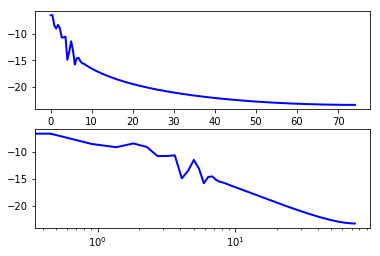

In [29]:
z_dft, z_fft = calculate(z)

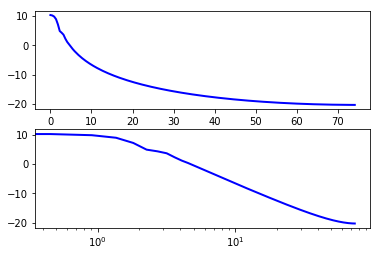

In [30]:
v_dft, v_fft = calculate(v)

In [35]:
def d(n):
    t = n / fs
    if t >= 0.7:
        return 0.2 * np.sin(40 * np.pi * t) * np.sin(20 * np.pi * t)
    elif t >= 0.2:
        return (1/t) * 0.8 * np.sin(34 * np.pi * t)
    else:
        return (t + 0.5) * np.sin(50 * np.pi * t)

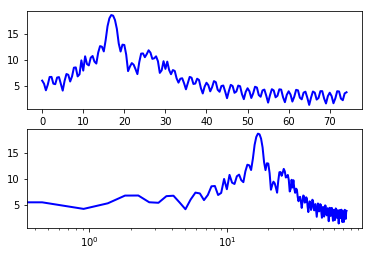

In [36]:
d_dft, d_fft = calculate(d)

In [37]:
g = lambda H: lambda n: (9 / np.pi ** 2) * sum([np.sin((i * (n / fs) * np.pi) / 2) * np.sin(20 * n * np.pi * (n / fs)) for i in range(1, H + 1)])

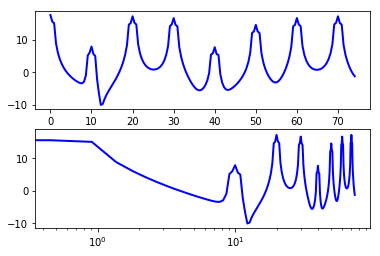

In [38]:
g_3_dft, g_3_fft = calculate(g(3))

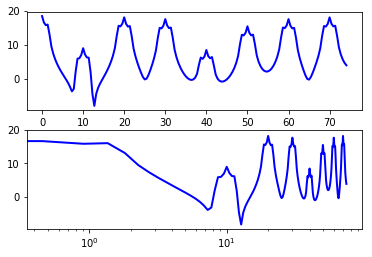

In [39]:
g_6_dft, g_6_fft = calculate(g(6))

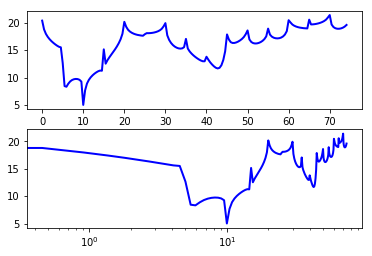

In [40]:
g_60_dft, g_60_fft = calculate(g(60))

In [41]:
import pandas as pd

In [48]:
data = {
    'dft': [x_dft, z_dft, v_dft, d_dft, g_3_dft, g_6_dft, g_60_dft],
    'fft': [x_fft, z_fft, v_fft, d_fft, g_3_fft, g_6_fft, g_60_fft],
}

data['dft'] += [np.sum(data['dft'])]
data['fft'] += [np.sum(data['fft'])]

pd.DataFrame(data=data, index=['x', 'z', 'v', 'd', 'g (H=3)', 'g (H=6)', 'g (H=60)', 'total'])

,dft,fft
x,00:00:00.574981,00:00:00.000758
z,00:00:00.706820,00:00:00.001189
v,00:00:00.689441,00:00:00.001209
d,00:00:00.485097,00:00:00.000499
g (H=3),00:00:01.055137,00:00:00.001976
g (H=6),00:00:01.664181,00:00:00.003987
g (H=60),00:00:11.100468,00:00:00.031857
total,00:00:16.276125,00:00:00.041475
